# Panel Plots
We are creating this notebook in order to practice creating panel plots
for Savitzky smoothing method and see how different parameters affect our estimates.

In [1]:
import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import datetime
import time
import scipy
import scipy.signal
import os, os.path

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


import sys
# start_time = time.time()

In [4]:
# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path

####################################################################################
###
###                      Local
###
####################################################################################

################
###
### Core path
###

sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')

################
###
### Directories
###
data_dir = "/Users/hn/Documents/01_research_data" + \
           "/remote_sensing/01_NDVI_TS/00_Eastern_WA_withYear/"

data_dir = "/Users/hn/Documents/01_research_data/remote_sensing/" + \
           "01_NDVI_TS/00_Eastern_WA_withYear/2Years/" 

param_dir = "/Users/hn/Documents/00_GitHub/Ag/remote_sensing/parameters/"
####################################################################################
###
###                      Aeolus Core path
###
####################################################################################

# sys.path.append('/home/hnoorazar/remote_sensing_codes/')

####################################################################################
###
###                   Aeolus Directories
###
####################################################################################

# data_dir = "/data/hydro/users/Hossein/remote_sensing/01_NDVI_TS/00_Eastern_WA_EE/"
# param_dir = "/home/hnoorazar/remote_sensing_codes/parameters/"

####################################################################################
###
###                   Import remote cores
###
####################################################################################

import remote_sensing_core as rc
import remote_sensing_plot_core as rcp


In [5]:
####################################################################################
###
###      Parameters                   
###
####################################################################################

eleven_colors = ["gray", "lightcoral", "red", "peru",
                 "darkorange", "gold", "olive", "green",
                 "blue", "violet", "deepskyblue"]

irrigated_only = 1
SF_year = 2017
indeks = "NDVI"
given_county = "Grant"

# delt = float(sys.argv[1])
# indeks = sys.argv[2]
# irrigated_only = int(sys.argv[3])
# SF_year = int(sys.argv[4])


# Read the Data

In [6]:
f_name = "Eastern_WA_" + str(SF_year) + "_70cloud_selectors.csv"
a_df = pd.read_csv(data_dir + f_name, low_memory=False)

In [7]:
####################################################################################
###
###                   process data
###
####################################################################################

##################################################################
##################################################################
####
####  plots has to be exact. So, we need 
#### to filter out NASS, and filter by last survey date
####
##################################################################
##################################################################

a_df = a_df[a_df['county']== given_county] # Filter Grant
a_df = rc.filter_out_NASS(a_df) # Toss NASS
a_df = rc.filter_by_lastSurvey(a_df, year = SF_year) # filter by last survey date
a_df['SF_year'] = SF_year

if irrigated_only == True:
    a_df = rc.filter_out_nonIrrigated(a_df)
    output_Irr = "irrigated_only"
else:
    output_Irr = "non_irrigated_only"
    a_df = rc.filter_out_Irrigated(a_df)

######################

# The following columns do not exist in the old data
#
if not('DataSrc' in a_df.columns):
    print ("Data source is being set to NA")
    a_df['DataSrc'] = "NA"

if not('CovrCrp' in a_df.columns):
    print ("CovrCrp is being set to NA")
    a_df['CovrCrp'] = "NA"

if (indeks == "EVI"):
    a_df = rc.initial_clean_EVI(a_df)
    print ("initial_clean_EVI")
else:
    a_df = rc.initial_clean_NDVI(a_df)
    print ("initial_clean_NDVI")

a_df.head(2)
an_EE_TS = a_df.copy()

CovrCrp is being set to NA
initial_clean_EVI


(0, 27)

In [25]:
### List of unique polygons
polygon_list = np.sort(an_EE_TS['ID'].unique())
print(len(polygon_list))

9175


In [26]:
counter = 0
a_poly = polygon_list[counter]

# curr_field = an_EE_TS[an_EE_TS['ID']==a_poly].copy()
curr_field = an_EE_TS[an_EE_TS['ID']== "100425_WSDA_SF_2017"].copy()
curr_field.sort_values(by=['image_year', 'doy'], inplace=True)

ID = curr_field['ID'].unique()[0]
plant = curr_field['CropTyp'].unique()[0]
plant = plant.replace("/", "_")
plant = plant.replace(",", "_")
plant = plant.replace(" ", "_")
plant = plant.replace("__", "_")

county = curr_field['county'].unique()[0]


In [29]:
print (curr_field.shape)

# curr_field = curr_field[curr_field.image_year.isin([2016, 2017])]

print (curr_field.image_year.unique())
print (curr_field.shape)

(62, 27)
[2016 2017]
(62, 27)


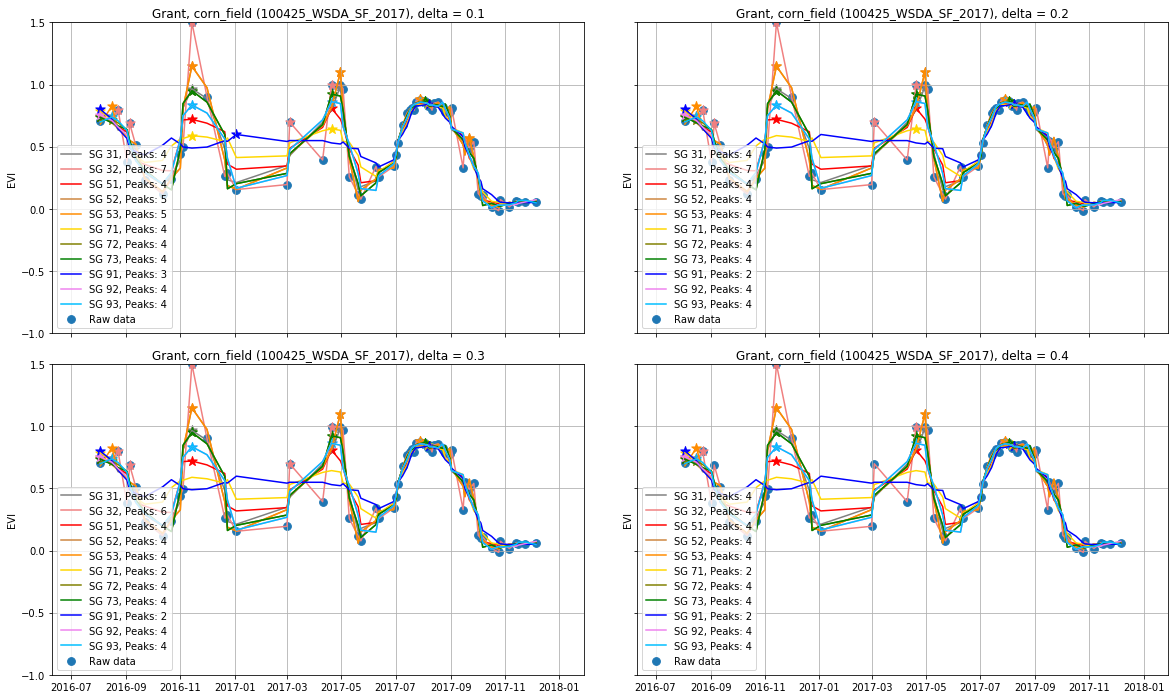

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(20,12),
                        sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.1, 'wspace': .1})

(ax1, ax2), (ax3, ax4) = axs
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

rcp.savitzky_2yrs_panel(crr_fld = curr_field, idx = indeks, deltA = 0.1, SFYr = SF_year, ax = ax1)
rcp.savitzky_2yrs_panel(crr_fld = curr_field, idx = indeks, deltA = 0.2, SFYr = SF_year, ax = ax2)
rcp.savitzky_2yrs_panel(crr_fld = curr_field, idx = indeks, deltA = 0.3, SFYr = SF_year, ax = ax3)
rcp.savitzky_2yrs_panel(crr_fld = curr_field, idx = indeks, deltA = 0.4, SFYr = SF_year, ax = ax4)

fig_name = "/Users/hn/Desktop/" + county + "_" + plant + "_" + str(SF_year) + "_" + str(counter) + '.png'

plt.savefig(fname = fig_name, dpi=250, bbox_inches='tight')


In [ ]:
print (an_EE_TS.system_start_time.iloc[0])
print ("___________________________________________")
print (time.strftime('%Y-%m-%d', time.localtime(an_EE_TS.system_start_time.iloc[0])))
print ("___________________________________________")

print ("Convert Epoch to datetime format")
print (datetime.datetime.fromtimestamp(an_EE_TS.system_start_time.iloc[0]))


# Convert Epoch to DoY
print ("___________________________________________")
print ("")
print ("Convert Epoch to DoY")
print ( (datetime.datetime.fromtimestamp(an_EE_TS.system_start_time.iloc[0])).timetuple().tm_yday  )

print ("___________________________________________")
print ("")
print ("difference number of days")
print ((date(2003,11,22) - date(2002,10,20)).days)

time.localtime(a_df_1.system_start_time.iloc[0])